In [131]:
import numpy as np
import pandas as pd

In [132]:
df=pd.read_csv('mail_data.csv')

In [133]:
df.sample(5)

,Category,Message
4944,ham,Check mail.i have mailed varma and kept copy t...
2445,ham,"Yes but i dont care! I need you bad, princess!"
2778,ham,Kind of. Took it to garage. Centre part of exh...
3650,ham,Hmm ill have to think about it... ok you're fo...
4834,spam,"New Mobiles from 2004, MUST GO! Txt: NOKIA to ..."


In [134]:
df.shape

(5572, 2)

Data cleaning


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [136]:
df.rename(columns={'Category':'Result'},inplace=True)
df.sample(5)

,Result,Message
1011,ham,Lol I would but my mom would have a fit and te...
50,ham,What you thinked about me. First time you saw ...
344,ham,Am not interested to do like that.
2210,ham,"Hmm well, night night"
2672,ham,"That's cool, I'll come by like &lt;#&gt; ish"


In [137]:
from sklearn.preprocessing import LabelEncoder 
encoder=LabelEncoder()

In [138]:
df['Result']=encoder.fit_transform(df['Result'])
df.head()

,Result,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [139]:
df.isnull().sum()

Result     0
Message    0
dtype: int64

In [140]:
df.duplicated().sum()

415

In [141]:
df=df.drop_duplicates(keep='first')

In [142]:
df.duplicated().sum()

0

In [143]:
df.shape

(5157, 2)

EDA

In [144]:
df.head()

,Result,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [145]:
df['Result'].value_counts()  #no of spams and hams

Result
0    4516
1     641
Name: count, dtype: int64

In [146]:
import matplotlib.pyplot as plt

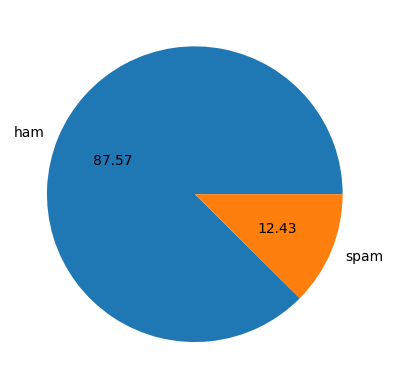

In [147]:
plt.pie(df['Result'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [148]:
! pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [149]:
import nltk

In [150]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\jnupu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [151]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jnupu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [152]:
df['num_char']= df['Message'].apply(len)
#no of char

In [153]:
df.head()

,Result,Message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [154]:
#no of words
df['Message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5157, dtype: object

In [155]:
df['Word_Count'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))


In [156]:
import nltk
nltk.download('punkt', quiet=True)  # auto-download if missing

df['Word_Count'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(str(x))))


In [157]:
import sys
print(sys.executable)



c:\Users\jnupu\AppData\Local\Programs\Python\Python312\python.exe


In [158]:
import nltk
print(nltk.data.path)


['C:\\Users\\jnupu/nltk_data', 'c:\\Users\\jnupu\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'c:\\Users\\jnupu\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'c:\\Users\\jnupu\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\jnupu\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [159]:
import nltk
import os

# Pick the first path in nltk.data.path
target_dir = nltk.data.path[0]
os.makedirs(target_dir, exist_ok=True)

# Download punkt directly there
nltk.download('punkt', download_dir=target_dir)

# Now tokenize
df['num_word'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(str(x))))


[nltk_data] Downloading package punkt to C:\Users\jnupu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [160]:
import nltk

# Download both required tokenizers
nltk.download('punkt')
nltk.download('punkt_tab')

# Now run your code
df['num_word'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(str(x))))


[nltk_data] Downloading package punkt to C:\Users\jnupu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jnupu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [161]:
df['num_word'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(str(x))))
print(df.head())


   Result                                            Message  num_char  \
0       0  Go until jurong point, crazy.. Available only ...       111   
1       0                      Ok lar... Joking wif u oni...        29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...       155   
3       0  U dun say so early hor... U c already then say...        49   
4       0  Nah I don't think he goes to usf, he lives aro...        61   

   Word_Count  num_word  
0          24        24  
1           8         8  
2          37        37  
3          13        13  
4          15        15  


In [162]:
df.head(5)

,Result,Message,num_char,Word_Count,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [163]:
df = df.drop(columns=["Word_Count"])


In [164]:
df.head(6)

,Result,Message,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39


In [165]:
df['num_sent'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(str(x))))


In [166]:
df.head(6)

,Result,Message,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4


In [167]:
df[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [168]:
df[df['Result']==1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [169]:
df[df['Result']==0][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [170]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

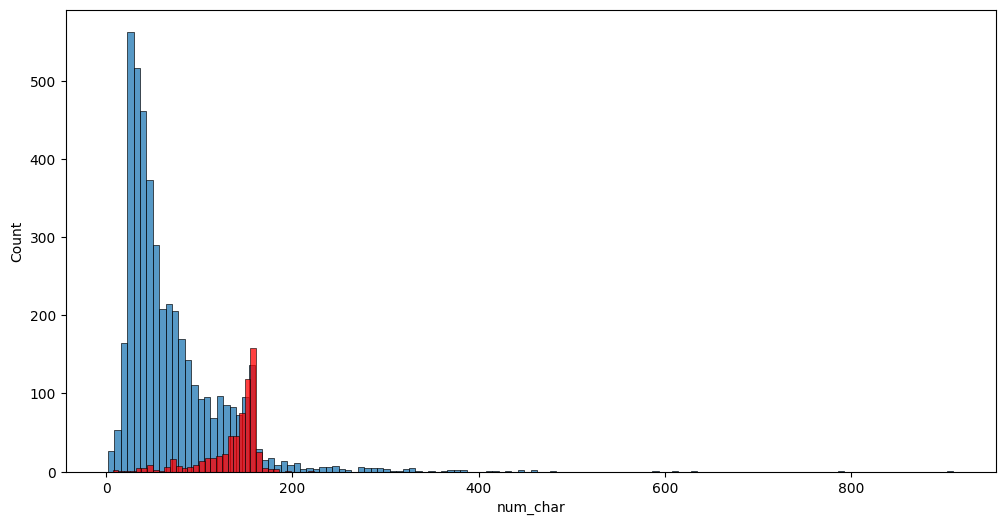

In [171]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Result']==0]['num_char'])
sns.histplot(df[df['Result']==1]['num_char'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

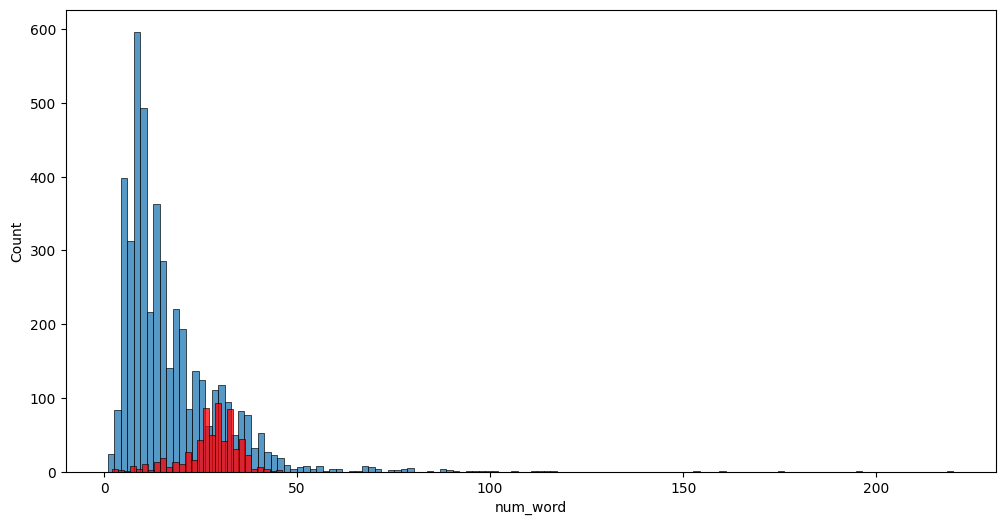

In [172]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Result']==0]['num_word'])
sns.histplot(df[df['Result']==1]['num_word'],color='red')

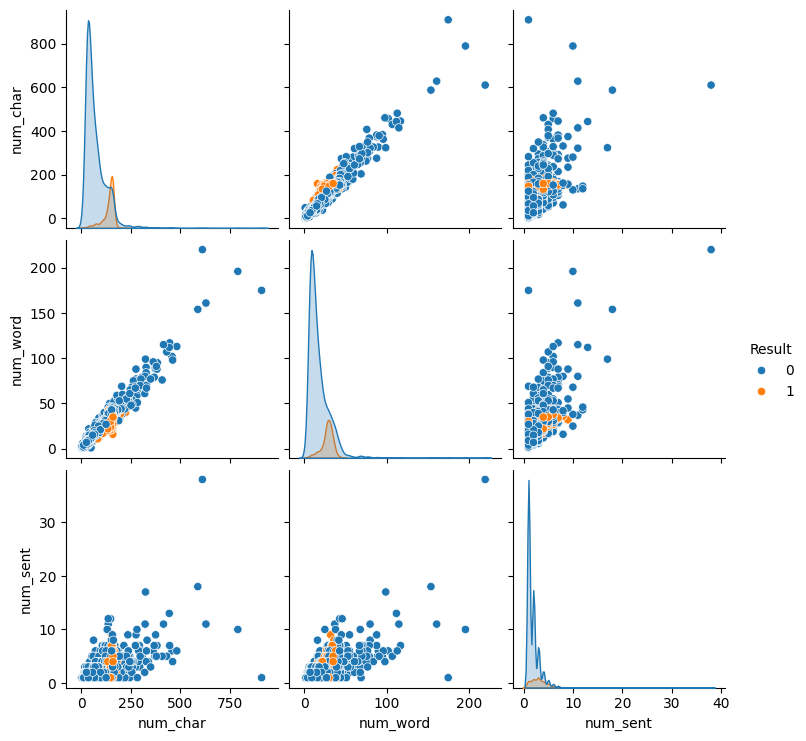

In [173]:
sns.pairplot(df,hue='Result')

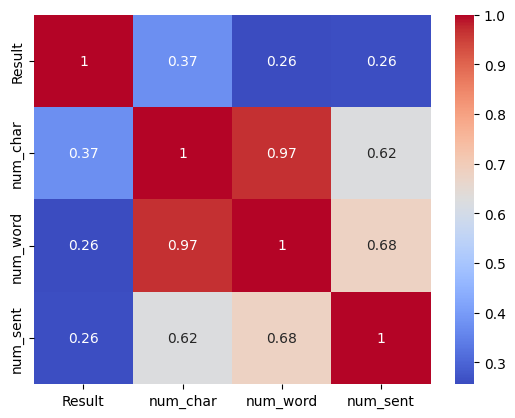

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


Data Preprocessing

In [175]:
from nltk.corpus import stopwords
import string

In [176]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]   #cloning is done
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [177]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [178]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [179]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')    #steeming brings in root form

'danc'

In [180]:
df['transformed_text']=df['Message'].apply(transform_text)

In [181]:
df.head(5)

,Result,Message,num_char,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [182]:
! pip install wordcloud



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [183]:
! pip install wordcloud matplotlib



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [184]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [185]:
spam_wc= wc.generate(df[df['Result']==1]['transformed_text'].str.cat(sep=" "))

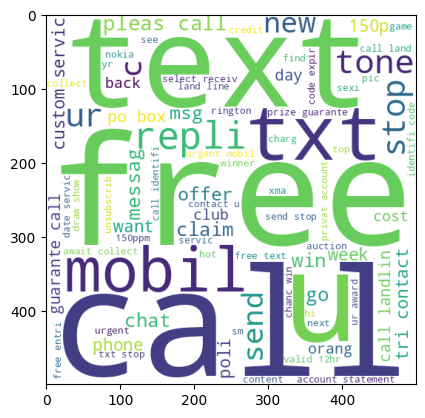

In [186]:
plt.imshow(spam_wc)

In [187]:
ham_wc= wc.generate(df[df['Result']==0]['transformed_text'].str.cat(sep=" "))

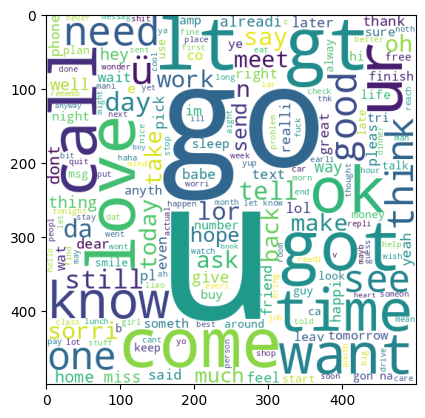

In [188]:
plt.imshow(ham_wc)

In [189]:
spam_corpus=[]
for msg in df[df['Result']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [190]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

<Axes: ylabel='0'>

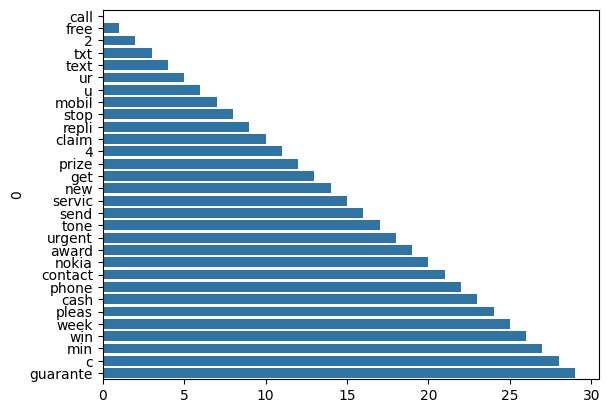

In [191]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])


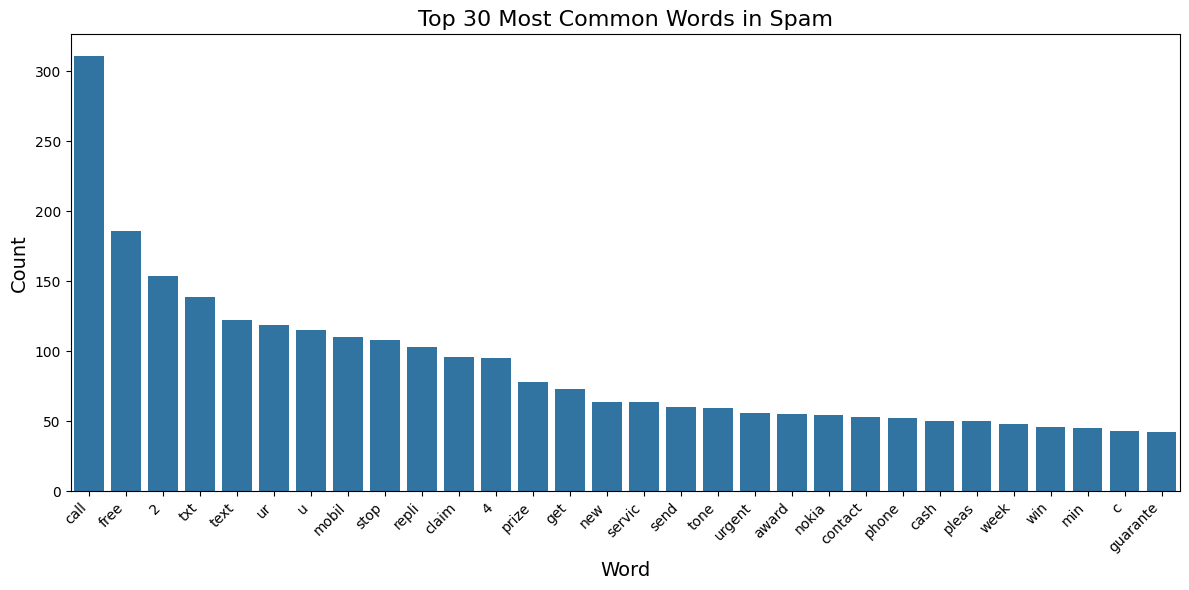

In [192]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame with top 30 most common spam words
common_df = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=['word', 'count']
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=common_df['word'], y=common_df['count'])

plt.xticks(rotation=45, ha='right')
plt.xlabel("Word", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Top 30 Most Common Words in Spam", fontsize=16)
plt.tight_layout()
plt.show()




Model Building

In [220]:
#naive bayes algo
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [221]:
x=cv.fit_transform(df['transformed_text']).toarray()

In [222]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x=scalar.fit_transform(x)

In [223]:
x.shape

(5157, 6781)

In [224]:
y=df['Result'].values

In [198]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [201]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [202]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [203]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8691860465116279
[[787 118]
 [ 17 110]]
0.4824561403508772


In [204]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9767441860465116
[[894  11]
 [ 13 114]]
0.912


In [205]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


In [206]:
#we are using bernoli bayes as

In [207]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [208]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [209]:
clfs = {
    'SVC' : svc,
    'KN' : knc,  
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [210]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [211]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9699612403100775, 0.9285714285714286)

In [212]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9699612403100775
Precision -  0.9285714285714286
For  KN
Accuracy -  0.9060077519379846
Precision -  1.0
For  DT
Accuracy -  0.9312015503875969
Precision -  0.9
For  LR
Accuracy -  0.9689922480620154
Precision -  0.9797979797979798
For  RF
Accuracy -  0.9699612403100775
Precision -  1.0


c:\Users\jnupu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9602713178294574
Precision -  0.9134615384615384
For  BgC
Accuracy -  0.9641472868217055
Precision -  0.9591836734693877
For  ETC
Accuracy -  0.9748062015503876
Precision -  1.0
For  GBDT
Accuracy -  0.9505813953488372
Precision -  0.975
For  xgb
Accuracy -  0.9709302325581395
Precision -  0.970873786407767


In [213]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [214]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906008,1.000000
4,RF,0.969961,1.000000
7,ETC,0.974806,1.000000
3,LR,0.968992,0.979798
8,GBDT,0.950581,0.975000
9,xgb,0.970930,0.970874
6,BgC,0.964147,0.959184
0,SVC,0.969961,0.928571
5,AdaBoost,0.960271,0.913462
2,DT,0.931202,0.900000


In [215]:
#model improve
performance_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [216]:
performance_df1

,Algorithm,Accuracy,Precision
1,KN,0.906008,1.000000
4,RF,0.969961,1.000000
7,ETC,0.974806,1.000000
3,LR,0.968992,0.979798
8,GBDT,0.950581,0.975000
9,xgb,0.970930,0.970874
6,BgC,0.964147,0.959184
0,SVC,0.969961,0.928571
5,AdaBoost,0.960271,0.913462
2,DT,0.931202,0.900000


In [ ]:
#voting and stacking 


In [228]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))